In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# --- Step 2: Load Dataset ---
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
# Display first few rows
print("Dataset Preview:")
print(df.head(), "\n")

Dataset Preview:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170   



In [4]:
# --- Step 3: Check for Missing Values ---
print("Missing values:\n", df.isnull().sum(), "\n")

Missing values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64 



In [5]:
# --- Step 4: Select Relevant Columns ---
cols = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight', 'Price']
data = df[cols]

In [6]:
# --- Step 5: EDA ---
print("Summary Statistics:\n", data.describe(), "\n")

Summary Statistics:
          Age_08_04             KM           HP    Automatic           cc  \
count  1436.000000    1436.000000  1436.000000  1436.000000   1436.00000   
mean     55.947075   68533.259749   101.502089     0.055710   1576.85585   
std      18.599988   37506.448872    14.981080     0.229441    424.38677   
min       1.000000       1.000000    69.000000     0.000000   1300.00000   
25%      44.000000   43000.000000    90.000000     0.000000   1400.00000   
50%      61.000000   63389.500000   110.000000     0.000000   1600.00000   
75%      70.000000   87020.750000   110.000000     0.000000   1600.00000   
max      80.000000  243000.000000   192.000000     1.000000  16000.00000   

             Doors      Weight         Price  
count  1436.000000  1436.00000   1436.000000  
mean      4.033426  1072.45961  10730.824513  
std       0.952677    52.64112   3626.964585  
min       2.000000  1000.00000   4350.000000  
25%       3.000000  1040.00000   8450.000000  
50%       4.

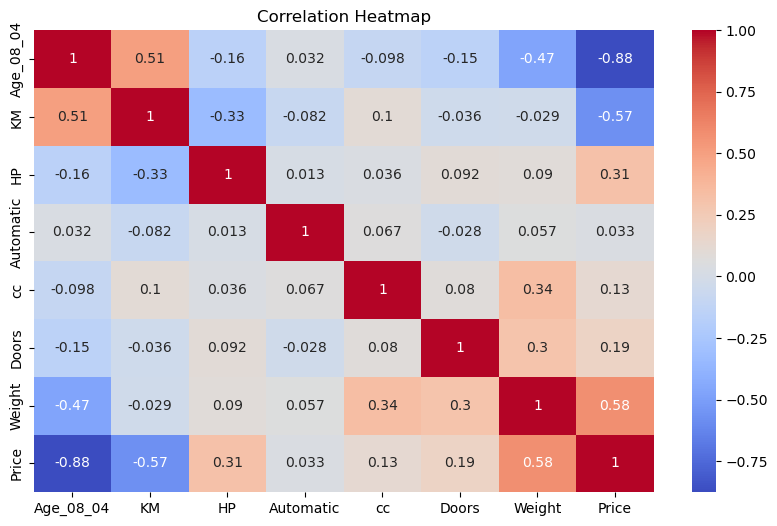

In [7]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# --- Step 6: Split Data into X (features) and y (target) ---
X = data.drop('Price', axis=1)
y = data['Price']

In [11]:
# --- Step 7: Handle Categorical Variables (FuelType) ---
numeric_features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']
categorical_features = ['Fuel_Type']

In [12]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [13]:
# --- Step 8: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Model 1: All Features
model1 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [15]:
model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('regressor', LinearRegression())])

In [20]:
# Model 2: Drop less important features
X2 = X.drop(['Doors', 'cc'], axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [23]:
preprocessor2 = ColumnTransformer([
    ('num', StandardScaler(), ['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']),
    ('cat', OneHotEncoder(drop='first'), ['Fuel_Type'])
])

In [24]:
model2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('regressor', LinearRegression())
])
model2.fit(X2_train, y2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('regressor', LinearRegression())])

In [25]:
# Model 3: Only numeric variables
model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
model3.fit(X_train[numeric_features], y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [26]:
# --- Step 10: Evaluate Models ---
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return r2, rmse

In [27]:
r2_1, rmse_1 = evaluate(model1, X_test, y_test)
r2_2, rmse_2 = evaluate(model2, X2_test, y2_test)
r2_3, rmse_3 = evaluate(model3, X_test[numeric_features], y_test)

In [28]:
print(f"Model 1 - R²: {r2_1:.3f}, RMSE: {rmse_1:.2f}")
print(f"Model 2 - R²: {r2_2:.3f}, RMSE: {rmse_2:.2f}")
print(f"Model 3 - R²: {r2_3:.3f}, RMSE: {rmse_3:.2f}")

Model 1 - R²: 0.833, RMSE: 1491.41
Model 2 - R²: 0.835, RMSE: 1484.79
Model 3 - R²: 0.851, RMSE: 1409.31


In [29]:
# --- Step 11: Apply Ridge & Lasso Regularization ---
ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

In [30]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('ridge', Ridge())])

In [31]:
lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.01))
])

In [32]:
lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('lasso', Lasso(alpha=0.01))])

In [33]:
r2_ridge, rmse_ridge = evaluate(ridge, X_test, y_test)
r2_lasso, rmse_lasso = evaluate(lasso, X_test, y_test)

In [34]:
print("\n--- Regularized Models ---")
print(f"Ridge - R²: {r2_ridge:.3f}, RMSE: {rmse_ridge:.2f}")
print(f"Lasso - R²: {r2_lasso:.3f}, RMSE: {rmse_lasso:.2f}")



--- Regularized Models ---
Ridge - R²: 0.834, RMSE: 1489.65
Lasso - R²: 0.833, RMSE: 1491.43


In [36]:
# --- Step 12: Coefficient Interpretation (Model 1 Example) ---
lin_reg = model1.named_steps['regressor']
encoded_features = list(preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)) + \
                   list(preprocessor.named_transformers_['cat'].get_feature_names_out(['Fuel_Type']))
coeffs = pd.DataFrame({
    'Feature': encoded_features,
    'Coefficient': lin_reg.coef_
})
print("\nModel Coefficients:\n", coeffs)


Model Coefficients:
             Feature  Coefficient
0         Age_08_04 -2267.156303
1                KM  -600.179991
2                HP   234.138332
3         Automatic    21.512689
4                cc   -14.098311
5             Doors   -80.500836
6            Weight  1326.190352
7  Fuel_Type_Diesel     4.202110
8  Fuel_Type_Petrol  1453.694461


##### Normalization

Normalization means scaling the values of features between a fixed range, usually 0 to 1.

Why helpful?

Prevents large-value features from dominating smaller-value features

Improves faster convergence in algorithms

Ensures fair weightage across all features

#### Standardization

Standardization transforms data so that it has:

mean = 0

standard deviation = 1

Why helpful?

Makes training stable

Allows models to give equal importance to all features

Helps gradient-based models converge faster

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
Techniques to address multicollinearity include removing redundant variables, combining correlated variables, and using regularization methods like Ridge or Lasso regression. Other approaches involve collecting more data to increase sample size or using Principal Component Analysis (PCA) to create a new set of uncorrelated variables. 
